In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import numpy as np
import torch
import itertools
from sklearn import preprocessing
import os
import seaborn as sns

sns.set()

D:\Anaconda\envs\plankton\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [35]:
def plot_confusion_matrix(cm, class_names, title):
    figure = plt.figure(figsize=(15, 15))
    plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()
    tick_marks = torch.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=90)
    plt.yticks(tick_marks, class_names)

    # Use white text if squares are dark; otherwise black.
    threshold = cm.max() / 2.0

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        color = "white" if cm[i, j] > threshold else "black"
        if cm[i, j] > 0.01:
            if int(cm[i, j]) == float(cm[i, j]):
                plt.text(j, i, str(cm[i, j]), horizontalalignment="center", color=color, fontsize=12)
            else:
                plt.text(j, i, "{:.2f}".format(cm[i, j]), horizontalalignment="center", color=color, fontsize=12)
    
    plt.grid(False)
    plt.tight_layout()
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    plt.close("all")
    return figure

In [36]:
file = "../data/PhyodiveCNNeval-at-2022-11-07-14-06-bc63c776.csv"
df = pd.read_csv(file, sep=";").dropna()
df["image"] = df["image"].apply(lambda x: os.path.basename(x))
df

,image,prediction,id,cnn-eval,class,annotator,annotation_id,created_at,updated_at,lead_time
2,20220623_075239.041.0.png,Noctiluca,728497,Ambiguous,Marine snow,3,4748,07.11.2022 15:01,07.11.2022 15:01,7633
3,20220626_074428.158.0.png,Noctiluca,825226,Ambiguous,Marine snow,3,4734,07.11.2022 15:00,07.11.2022 15:00,18953
4,20220621_131043.967.1.png,Marine snow,967058,Ambiguous,Noctiluca,3,4666,07.11.2022 14:46,07.11.2022 14:46,9489
5,20220809_153000.232.0.png,Marine snow,870638,Ambiguous,Noctiluca,3,4584,07.11.2022 09:56,07.11.2022 09:56,31006
6,20220803_160105.992.0.png,Marine snow,1049395,Ambiguous,Noctiluca,1,4278,06.11.2022 23:45,06.11.2022 23:45,8141
...,...,...,...,...,...,...,...,...,...,...
795,20220626_125956.308.1.png,Marine snow,834739,Wrong,Noctiluca,1,4189,06.11.2022 23:32,06.11.2022 23:32,8969
796,20220610_074412.154.0.png,Blurry,957965,Wrong,Marine snow,1,4181,06.11.2022 23:31,06.11.2022 23:31,6849
797,20220623_075158.645.1.png,Blurry,732075,Wrong,Noctiluca,1,4157,06.11.2022 23:26,06.11.2022 23:26,14716
799,20220803_182235.084.0.png,Diatom chain,1032262,Wrong,Noctiluca,1,4028,05.11.2022 23:57,05.11.2022 23:57,5913


In [37]:
le = preprocessing.LabelEncoder()
le.fit(df["class"])

y_true = le.transform(df["class"])
y_pred = le.transform(df["prediction"])
labels = le.classes_

cm = confusion_matrix(y_true=y_true, y_pred=y_pred).T

0.8809523809523809

In [38]:
df["class"].unique()

array(['Marine snow', 'Noctiluca', 'Blurry', 'Diatom chain',
       'Pluteus larvae', 'Bubbles', 'Copepods', 'Other'], dtype=object)

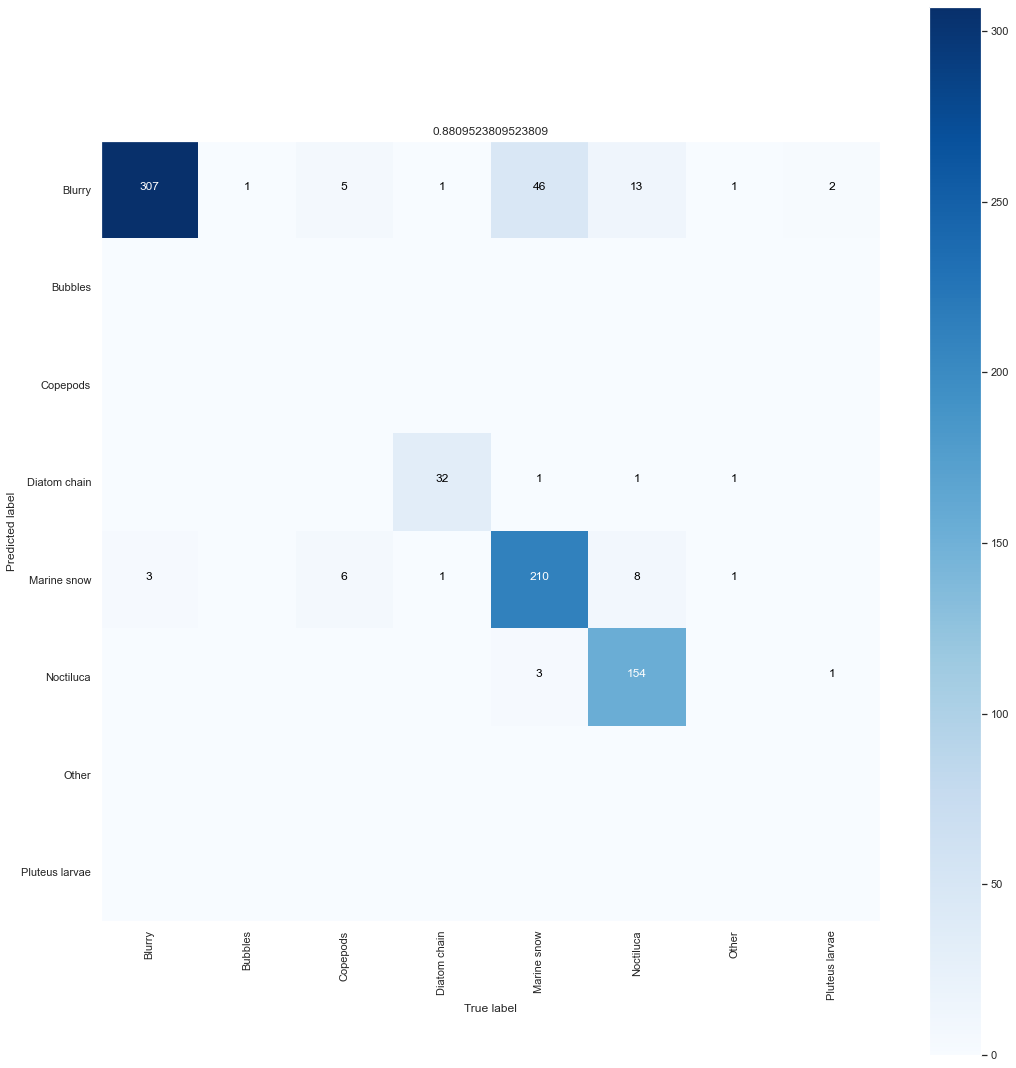

In [42]:
plot_confusion_matrix(cm, labels, title=(y_true == y_pred).mean())

In [22]:
df[(df["prediction"]=="Marine snow") & (df["class"] == "Copepods")]

,image,prediction,id,cnn-eval,class,annotator,annotation_id,created_at,updated_at,lead_time
737,20220803_142841.676.0.png,Marine snow,1066658,Wrong,Copepods,3,4709,07.11.2022 14:57,07.11.2022 14:57,24019
758,20220803_102314.806.0.png,Marine snow,1075339,Wrong,Copepods,3,4569,07.11.2022 09:54,07.11.2022 09:54,6136
782,20220803_175311.082.1.png,Marine snow,1060942,Wrong,Copepods,3,4355,07.11.2022 09:21,07.11.2022 09:21,11744
789,20220804_013452.076.0.png,Marine snow,816344,Wrong,Copepods,1,4258,06.11.2022 23:43,06.11.2022 23:43,8025
791,20220804_112856.787.0.png,Marine snow,788594,Wrong,Copepods,1,4214,06.11.2022 23:36,06.11.2022 23:36,15693
794,20220804_030701.907.0.png,Marine snow,805034,Wrong,Copepods,1,4192,06.11.2022 23:33,06.11.2022 23:33,51672


In [23]:
# letst compare with probabilties:
out_file = "phytodive_inference_corrected.csv"
df_complete = pd.read_csv(out_file, sep=";").rename(columns={"file":"image"})
df_complete["image"] = df_complete["image"].apply(lambda x: os.path.basename(x))
df_complete

,image,prediction,p_Blurry,p_Bubbles,p_Copepods,p_Ctenophore,p_Diatom chain,p_Dinoflagellate,p_Marine snow,p_Noctiluca,p_Other,p_Pluteus larvae
0,20220623_071103.834.1.png,Noctiluca,2.639673e-04,7.400690e-06,6.542844e-06,6.562341e-06,1.544579e-06,2.294547e-06,4.096141e-06,0.999679,1.855811e-05,1.049179e-05
1,20220623_074755.195.0.png,Blurry,8.634347e-01,1.757765e-03,2.700781e-03,1.616228e-03,6.855118e-03,8.957894e-04,6.884151e-03,0.107287,7.221814e-03,1.346539e-03
2,20220623_073445.339.0.png,Marine snow,4.823491e-02,1.549366e-05,1.024738e-04,1.311905e-05,2.409353e-04,7.512047e-06,9.500671e-01,0.001079,2.284480e-04,1.084805e-05
3,20220623_072507.641.0.png,Noctiluca,1.498706e-06,5.435754e-06,2.002066e-06,4.157538e-06,7.838775e-07,1.549793e-06,1.226189e-06,0.999958,1.321686e-05,1.177241e-05
4,20220623_074655.650.1.png,Noctiluca,4.366224e-04,1.922049e-04,1.734371e-04,1.637603e-04,8.351880e-05,8.532352e-05,3.570810e-04,0.997755,4.643227e-04,2.888685e-04
...,...,...,...,...,...,...,...,...,...,...,...,...
726816,20220609_111841.435.0.png,Marine snow,8.120633e-03,1.345596e-04,6.243840e-04,1.615598e-04,4.508462e-04,1.032040e-04,9.741684e-01,0.015102,9.525706e-04,1.819576e-04
726817,20220609_110003.440.1.png,Marine snow,4.828946e-02,2.809661e-02,3.782632e-02,3.009999e-02,5.104677e-02,2.212693e-02,4.019720e-01,0.243992,9.822737e-02,3.832277e-02
726818,20220609_111543.447.0.png,Noctiluca,3.932571e-11,5.186098e-10,5.003340e-11,3.331635e-10,8.446180e-12,6.082851e-11,1.209598e-12,1.000000,1.454014e-09,2.313619e-09
726819,20220609_113425.913.1.png,Marine snow,2.300908e-03,5.747122e-04,1.370708e-03,7.331463e-04,1.424917e-03,4.362413e-04,9.654238e-01,0.022716,3.954426e-03,1.064789e-03


In [32]:
df_merged = pd.merge(
    left=df,
    right=df_complete,
    how="left",
    on="image",
    left_on=None,
    right_on=None,
    left_index=False,
    right_index=False,
    sort=True,
    suffixes=("_x", "_y"),
    copy=True,
    indicator=False,
    validate=None,
)


p_cols = [key for key in list(df_merged.keys()) if key.startswith("p_")]
df_merged["max_p"] = df_merged[p_cols].max(axis=1)
df_merged

,image,prediction_x,id,cnn-eval,class,annotator,annotation_id,created_at,updated_at,lead_time,...,p_Bubbles,p_Copepods,p_Ctenophore,p_Diatom chain,p_Dinoflagellate,p_Marine snow,p_Noctiluca,p_Other,p_Pluteus larvae,max_p
0,20220609_101540.818.0.png,Diatom chain,1083562,Right,Diatom chain,3,4398,07.11.2022 09:24,07.11.2022 09:24,1854,...,0.001081,0.003020,0.000870,0.906196,0.000998,0.024019,0.002292,0.021288,0.001011,0.906196
1,20220609_104019.241.0.png,Diatom chain,1081071,Right,Diatom chain,1,4055,06.11.2022 00:01,06.11.2022 00:01,4382,...,0.000219,0.000669,0.000176,0.975230,0.000218,0.010392,0.000552,0.008089,0.000224,0.975230
2,20220609_104324.892.0.png,Marine snow,1083481,Right,Marine snow,3,4353,07.11.2022 09:21,07.11.2022 09:21,1781,...,0.000056,0.000184,0.000072,0.000637,0.000045,0.995576,0.001952,0.000709,0.000106,0.995576
3,20220609_104741.351.0.png,Marine snow,1081131,Right,Marine snow,3,4532,07.11.2022 09:52,07.11.2022 09:52,2025,...,0.000388,0.001314,0.000556,0.001144,0.000342,0.957438,0.030658,0.002790,0.000837,0.957438
4,20220609_105542.433.0.png,Blurry,1081855,Right,Blurry,3,4496,07.11.2022 09:50,07.11.2022 09:50,151,...,0.000006,0.000014,0.000004,0.000103,0.000002,0.001580,0.000372,0.000043,0.000003,0.997873
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
793,20220809_200757.515.0.png,Marine snow,874982,Right,Marine snow,1,4030,05.11.2022 23:57,05.11.2022 23:57,9529,...,0.000965,0.004431,0.001122,0.001009,0.000709,0.896986,0.009635,0.003790,0.000880,0.896986
794,20220809_200820.272.1.png,Marine snow,876162,Right,Marine snow,1,4096,06.11.2022 00:07,06.11.2022 00:07,10007,...,0.002712,0.008845,0.002994,0.004636,0.002043,0.751800,0.126209,0.013240,0.003392,0.751800
795,20220809_201418.411.0.png,Marine snow,874867,Right,Marine snow,3,4716,07.11.2022 14:58,07.11.2022 14:58,492,...,0.000581,0.004036,0.000536,0.004059,0.000447,0.885303,0.005159,0.002508,0.000564,0.885303
796,20220809_201955.406.0.png,Blurry,874355,Wrong,Marine snow,3,4607,07.11.2022 09:57,07.11.2022 09:57,4552,...,0.000808,0.001784,0.000509,0.000593,0.000352,0.023018,0.005824,0.001503,0.000405,0.965203


In [25]:
df_wrong = df_merged[df_merged["cnn-eval"] == "Wrong"].copy()
p_cols = [key for key in df_merged.keys() if key.startswith("p_")]
df_wrong["max_p"] = df_wrong[p_cols].max(axis=1)

df_wrong_grouped = df_wrong.groupby("class").mean()[p_cols].reset_index()
df_wrong_grouped

,class,p_Blurry,p_Bubbles,p_Copepods,p_Ctenophore,p_Diatom chain,p_Dinoflagellate,p_Marine snow,p_Noctiluca,p_Other,p_Pluteus larvae
0,Blurry,0.400039,0.000100,0.000449,0.000081,0.002540,0.000067,0.594755,0.001237,0.000655,0.000077
1,Bubbles,0.946416,0.001153,0.002208,0.000633,0.001055,0.000444,0.035313,0.010049,0.002255,0.000474
2,Copepods,0.463150,0.008278,0.020233,0.006826,0.015277,0.005712,0.429030,0.025171,0.019676,0.006647
3,Diatom chain,0.547610,0.014741,0.022761,0.014211,0.054741,0.011942,0.210480,0.059865,0.048842,0.014807
4,Marine snow,0.733158,0.002988,0.007246,0.002739,0.023073,0.002048,0.187314,0.027844,0.011112,0.002478
5,Noctiluca,0.596063,0.004545,0.007026,0.004534,0.040487,0.003733,0.079683,0.237234,0.021373,0.005321
6,Other,0.327390,0.018888,0.032449,0.018527,0.149286,0.014903,0.215842,0.103126,0.097728,0.021860
7,Pluteus larvae,0.615043,0.005612,0.012868,0.006077,0.005275,0.003583,0.049227,0.281154,0.015922,0.005239


In [26]:
df_wrong_grouped = pd.melt(df_wrong_grouped, id_vars="class", var_name="label", value_name="probability")
df_wrong_grouped.head()

,class,label,probability
0,Blurry,p_Blurry,0.400039
1,Bubbles,p_Blurry,0.946416
2,Copepods,p_Blurry,0.463150
3,Diatom chain,p_Blurry,0.547610
4,Marine snow,p_Blurry,0.733158


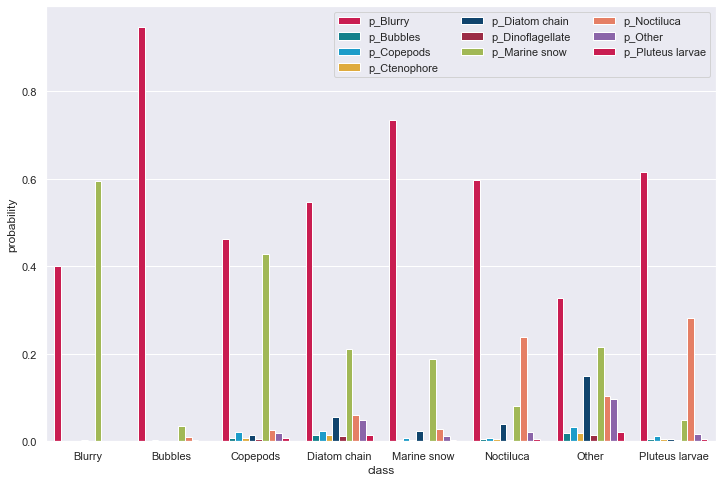

'mean(p(prediction|image)) | prediction != truth'

In [27]:
from matplotlib.colors import ListedColormap
import seaborn as sns
sns.set()

hereon_color_array = np.array([
         [230, 0, 70],
    [0,145,160],

    [0, 170, 230],
   
    
    [250,180,35],
    [0,70,125],
    [175, 25, 60],
    [170, 200 ,70],
    [250,115,80],
    [140, 90, 180],
      
])
hereon_color_array = hereon_color_array / 255
hereon_cmap = ListedColormap(hereon_color_array)

sns.set_palette(hereon_color_array)

fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(x="class", y="probability", data=df_wrong_grouped, hue="label", ax=ax, palette=hereon_color_array)
ax.legend(ncol=3)
plt.show()

"""mean(p(prediction|image)) | prediction != truth"""

In [28]:
df_ambiguous = df_merged[df_merged["cnn-eval"] == "Ambiguous"].copy()
p_cols = [key for key in df_merged.keys() if key.startswith("p_")]
df_ambiguous["max_p"] = df_ambiguous[p_cols].max(axis=1)

df_ambiguous_grouped = df_ambiguous.groupby("class").mean()[p_cols].reset_index()
df_ambiguous_grouped

,class,p_Blurry,p_Bubbles,p_Copepods,p_Ctenophore,p_Diatom chain,p_Dinoflagellate,p_Marine snow,p_Noctiluca,p_Other,p_Pluteus larvae
0,Blurry,0.200393,0.000918,0.004831,0.000955,0.001410,0.000652,0.780911,0.005653,0.003531,0.000745
1,Marine snow,0.586036,0.002311,0.004662,0.002177,0.003535,0.001457,0.169535,0.221240,0.006554,0.002492
2,Noctiluca,0.339472,0.001235,0.001964,0.001431,0.001778,0.000776,0.511065,0.134514,0.005892,0.001873


In [29]:
df_ambiguous_grouped = pd.melt(df_ambiguous_grouped, id_vars="class", var_name="label", value_name="probability")
df_ambiguous_grouped.head()

,class,label,probability
0,Blurry,p_Blurry,0.200393
1,Marine snow,p_Blurry,0.586036
2,Noctiluca,p_Blurry,0.339472
3,Blurry,p_Bubbles,0.000918
4,Marine snow,p_Bubbles,0.002311


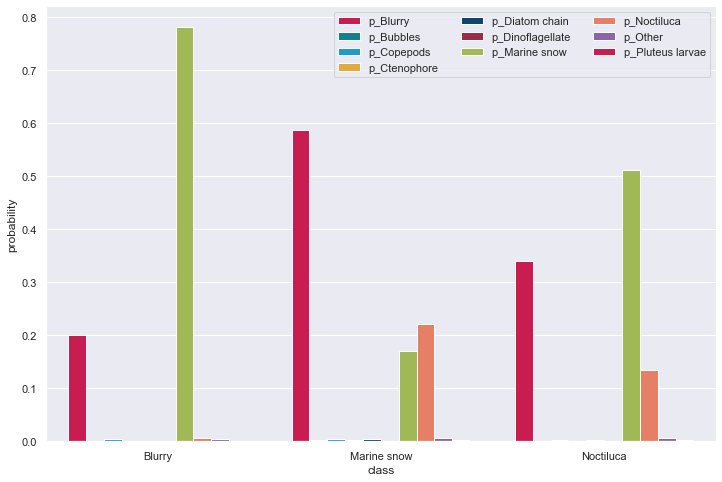

In [30]:
fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(x="class", y="probability", data=df_ambiguous_grouped, hue="label", ax=ax, palette=hereon_color_array)
ax.legend(ncol=3)
plt.show()

In [34]:
df_low_certainty = df_merged[df_merged["max_p"] < 0.3].copy()
df_low_certainty

,image,prediction_x,id,cnn-eval,class,annotator,annotation_id,created_at,updated_at,lead_time,...,p_Bubbles,p_Copepods,p_Ctenophore,p_Diatom chain,p_Dinoflagellate,p_Marine snow,p_Noctiluca,p_Other,p_Pluteus larvae,max_p
490,20220803_111701.810.0.png,Marine snow,1043983,Right,Marine snow,3,4425,07.11.2022 09:26,07.11.2022 09:26,3997,...,0.034611,0.047324,0.029799,0.104622,0.02528,0.267174,0.189948,0.113976,0.036531,0.267174
